In [5]:
%cd ../src
# from loader import * 
# from datasets import *
from vis import *
from log import logger
import log
logger.setLevel(log.WARN)

%load_ext autoreload
%autoreload 2
%aimport loader

import matplotlib
import matplotlib.pyplot as plt 
matplotlib.style.use('ggplot')
# print matplotlib.style.available

%matplotlib inline
# %matplotlib notebook

/home/wangxinglu/prj/Perf_Pred/src
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ok


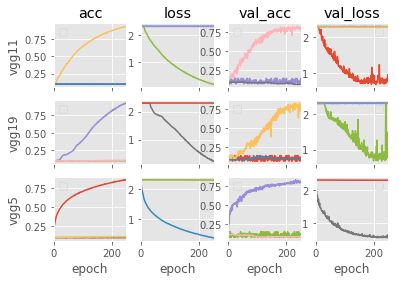

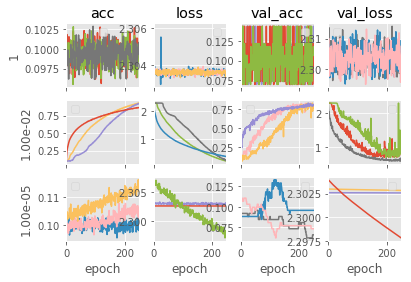

In [6]:
config_dict = {'model_type': ['vgg5', 'vgg11', 'vgg19'],
                   'lr': [1, 1e-2, 1e-5]}
visualizer = Visualizer(config_dict,join='outer')
perf_df = visualizer.perf_df
_df = perf_df
_df = visualizer.select(_df, 'dataset_type', 'cifar10')

# visualizer.plot_perf(_df,  ('lr', 'name', 'model_type'))
visualizer.plot_perf(_df,  ('model_type', 'name', 'lr'),False)
visualizer.plot_perf(_df,  ('lr', 'name', 'model_type'),False)
print 'ok'

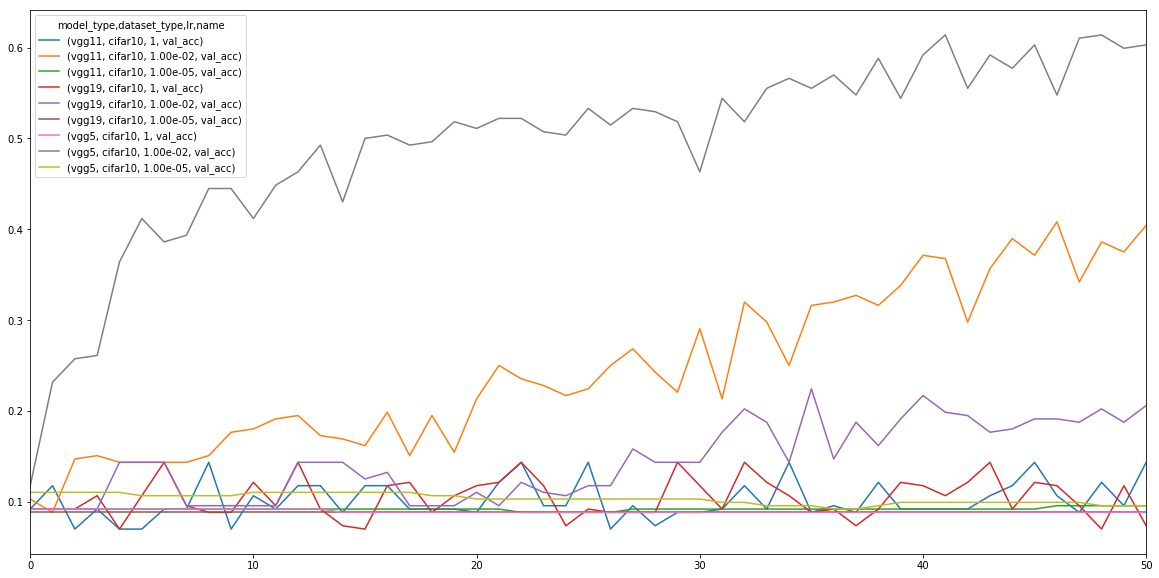

In [15]:
perf_df=visualizer.perf_df
_df=perf_df
_df=visualizer.select(_df,'name','(?:val_acc)')
# _df=visualizer.select(_df,'model_type','vgg5')
# _df=visualizer.select(_df,'lr','^1$')
_df.plot(figsize=(20,10),marker=None)
# plt.legend(bbox_to_anchor=(1.08,1.08))

In [16]:
_df.head()

model_type       vgg11                         vgg19                      \
dataset_type   cifar10                       cifar10                       
lr                   1  1.00e-02  1.00e-05         1  1.00e-02  1.00e-05   
name           val_acc   val_acc   val_acc   val_acc   val_acc   val_acc   
0             0.091912  0.102941  0.091912  0.091912  0.091912  0.088235   
1             0.117647  0.088235  0.091912  0.091912  0.091912  0.088235   
2             0.069853  0.147059  0.091912  0.091912  0.091912  0.088235   
3             0.091912  0.150735  0.091912  0.106618  0.091912  0.088235   
4             0.069853  0.143382  0.091912  0.069853  0.143382  0.088235   

model_type        vgg5                      
dataset_type   cifar10                      
lr                   1  1.00e-02  1.00e-05  
name           val_acc   val_acc   val_acc  
0             0.091912  0.117647  0.110294  
1             0.091912  0.231618  0.110294  
2             0.091912  0.257353  0.110294  
3             0.091912  0.261029  0.110294  
4             0.091912  0.363971  0.110294

In [19]:
visualizer = Visualizer(config_dict,join='inner')
stat_df=visualizer.stat_df
t=stat_df.columns.get_level_values('lr')
np.unique(t)

array([u'1', u'1.00e-02', u'1.00e-05'], dtype=object)

In [112]:
_df=stat_df
_df=visualizer.select(_df,'model_type','vgg11')
# _df=visualizer.select(_df,'lr','1.*?e-02')
_df=visualizer.select(_df,'name','.*mean$')
_df.index.name='epoch'
f_df=_df.stack(2).reset_index(drop=False)
f_df.head()

model_type   epoch        lr                vgg11                        \
dataset_type                              cifar10                         
name                         obs0/conv2d/act/mean obs0/conv2d/bias/mean   
0                0         1            -0.039672         -8.779589e-03   
1                0  1.00e-02            -0.002930         -5.749313e-05   
2                0  1.00e-05            -0.002390         -6.151325e-08   
3                5         1            -0.038338         -8.687808e-03   
4                5  1.00e-02            -0.002342         -4.846326e-04   

model_type                                                 \
dataset_type                                                
name         obs0/conv2d/kernel/mean obs1/conv2d/act/mean   
0                          -0.002411            -0.024259   
1                          -0.000228            -0.012591   
2                          -0.000189            -0.012342   
3                          -0.002308            -0.024677   
4                          -0.000138            -0.012357   

model_type                                                  \
dataset_type                                                 
name         obs1/conv2d/bias/mean obs1/conv2d/kernel/mean   
0                    -5.890300e-03               -0.000337   
1                    -3.147139e-05               -0.000160   
2                    -4.043332e-08               -0.000157   
3                    -5.937434e-03               -0.000334   
4                    -2.673327e-04               -0.000154   

model_type                                               \
dataset_type                                              
name         obs2/conv2d/act/mean obs2/conv2d/bias/mean   
0                       -0.005819         -3.211499e-03   
1                        0.006622         -2.079471e-05   
2                        0.007062         -2.571918e-08   
3                       -0.005664         -3.202973e-03   
4                        0.006997         -1.553190e-04   

model_type             ...                                    \
dataset_type           ...                                     
name                   ...           obs4/conv2d/kernel/mean   
0                      ...                     -3.459695e-05   
1                      ...                     -4.990858e-07   
2                      ...                      2.775913e-07   
3                      ...                     -3.396753e-05   
4                      ...                      1.614747e-06   

model_type                                               \
dataset_type                                              
name         obs5/conv2d/act/mean obs5/conv2d/bias/mean   
0                       -0.003603         -3.353061e-03   
1                        0.000126         -3.149049e-05   
2                        0.000258         -3.268572e-08   
3                       -0.003649         -3.413670e-03   
4                       -0.000015         -2.097279e-04   

model_type                                                 \
dataset_type                                                
name         obs5/conv2d/kernel/mean obs6/conv2d/act/mean   
0                          -0.000018            -0.005042   
1                           0.000009            -0.000129   
2                           0.000010             0.000052   
3                          -0.000018            -0.005247   
4                           0.000010            -0.000185   

model_type                                                  \
dataset_type                                                 
name         obs6/conv2d/bias/mean obs6/conv2d/kernel/mean   
0                    -4.730191e-03               -0.000025   
1                    -6.445950e-05               -0.000003   
2                    -7.086402e-08               -0.000002   
3                    -4.979078e-03               -0.000025   
4                    -2.906642e

In [128]:
_df=stat_df
_df=visualizer.select(_df,'model_type','vgg11')
# _df=visualizer.select(_df,'lr','1.*?e-02')
_df=visualizer.select(_df,'name','.*mean$')
_df.index.name='epoch'
f_df=_df.stack(2).reset_index(drop=False)
f_df.head()
idx=pd.IndexSlice
# f_df.loc[:,idx[['vgg','lr'],:,:]]
ind_l=[]
for ind in f_df.columns:
    if ind[-1]=='':
        ind_l.append(ind[0])
    else:
#         ind_l.append(ind[-1])
        ind_l.append(ind[-1][3]+'_'+ ind[-1][-6] +'_'+ ind[-1][-4])
f_df.columns=ind_l        
f_df.head()

,epoch,lr,0_t_m,0_s_m,0_l_m,1_t_m,1_s_m,1_l_m,2_t_m,2_s_m,...,4_l_m,5_t_m,5_s_m,5_l_m,6_t_m,6_s_m,6_l_m,7_t_m,7_s_m,7_l_m
0,0,1,-0.039672,-8.779589e-03,-0.002411,-0.024259,-5.890300e-03,-0.000337,-0.005819,-3.211499e-03,...,-3.459695e-05,-0.003603,-3.353061e-03,-0.000018,-0.005042,-4.730191e-03,-0.000025,-0.007312,-7.124588e-03,-0.000006
1,0,1.00e-02,-0.002930,-5.749313e-05,-0.000228,-0.012591,-3.147139e-05,-0.000160,0.006622,-2.079471e-05,...,-4.990858e-07,0.000126,-3.149049e-05,0.000009,-0.000129,-6.445950e-05,-0.000003,-0.000014,-7.972569e-05,0.000009
2,0,1.00e-05,-0.002390,-6.151325e-08,-0.000189,-0.012342,-4.043332e-08,-0.000157,0.007062,-2.571918e-08,...,2.775913e-07,0.000258,-3.268572e-08,0.000010,0.000052,-7.086402e-08,-0.000002,0.000063,-9.963139e-08,0.000009
3,5,1,-0.038338,-8.687808e-03,-0.002308,-0.024677,-5.937434e-03,-0.000334,-0.005664,-3.202973e-03,...,-3.396753e-05,-0.003649,-3.413670e-03,-0.000018,-0.005247,-4.979078e-03,-0.000025,-0.008447,-8.325079e-03,-0.000006
4,5,1.00e-02,-0.002342,-4.846326e-04,-0.000138,-0.012357,-2.673327e-04,-0.000154,0.006997,-1.553190e-04,...,1.614747e-06,-0.000015,-2.097279e-04,0.000010,-0.000185,-2.906642e-04,-0.000003,-0.000468,-5.474504e-04,0.000008


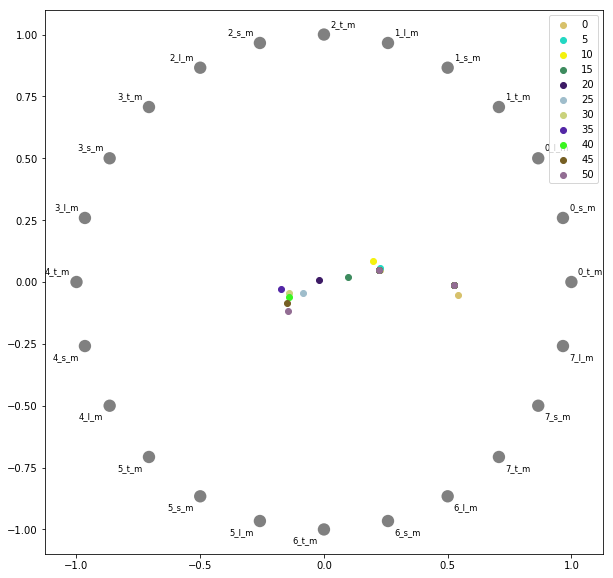

In [130]:
idx = pd.IndexSlice
f_df['lr']=f_df['lr'].astype('float')
pd.concat( ( f_df.loc[:,idx['epoch']] ,f_df.loc[:,idx['0_t_m':]] ),axis=1).head()
plt.figure(figsize=(10,10))
radviz(pd.concat( ( f_df.loc[:,idx['epoch']] ,f_df.loc[:,idx['0_t_m':]] ),axis=1), 'epoch')

In [4]:
visualizer.df.columns.get_level_values('name')

Index([u'acc', u'loss', u'obs0/conv2d/act/iqr', u'obs0/conv2d/act/max',
       u'obs0/conv2d/act/mean', u'obs0/conv2d/act/median',
       u'obs0/conv2d/act/min', u'obs0/conv2d/act/std', u'obs0/conv2d/bias/iqr',
       u'obs0/conv2d/bias/max',
       ...
       u'obs3/conv2d/bias/min', u'obs3/conv2d/bias/std',
       u'obs3/conv2d/kernel/iqr', u'obs3/conv2d/kernel/max',
       u'obs3/conv2d/kernel/mean', u'obs3/conv2d/kernel/median',
       u'obs3/conv2d/kernel/min', u'obs3/conv2d/kernel/std', u'val_acc',
       u'val_loss'],
      dtype='object', name=u'name', length=1256)

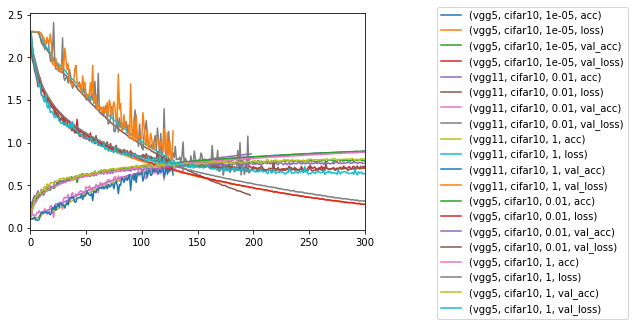

In [115]:
scalars.plot()
plt.legend(bbox_to_anchor=(1.8, 1.05))

In [31]:
plt.legend(loc='right',bbox_to_anchor=(1.8, 1.05))